In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

batch_size = 10
validation_data_dir = "./datasetValid"
train_data_dir = "./datasetTrain"


In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(300, 300),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(300, 300),
        batch_size=32,
        class_mode='categorical')


Found 262 images belonging to 7 classes.
Found 98 images belonging to 7 classes.


In [3]:
def createModel():
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Convolution2D(16, (3, 3), input_shape=(300, 300, 3), activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))

    model.add(tf.keras.layers.Convolution2D(32, (3, 3), activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))

    model.add(tf.keras.layers.Convolution2D(64, (3, 3), activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))

    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Dense(7, activation='softmax'))

    return model


In [4]:
model = createModel()

model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 64)        0

In [5]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(train_generator, epochs=50, validation_data=validation_generator, callbacks=[es])

now = datetime.now()
timestamp = datetime.timestamp(now)

model.save(str(timestamp) + "Adam-50Epoch" + ".h5")


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 27 steps, validate for 4 steps
Epoch 1/50
27/27 [==============================] - 6s 237ms/step - loss: 1.9930 - accuracy: 0.1641 - val_loss: 1.9202 - val_accuracy: 0.2551
Epoch 2/50
27/27 [==============================] - 6s 219ms/step - loss: 1.9265 - accuracy: 0.1794 - val_loss: 1.8815 - val_accuracy: 0.3367
Epoch 3/50
27/27 [==============================] - 6s 224ms/step - loss: 1.7694 - accuracy: 0.3015 - val_loss: 1.5771 - val_accuracy: 0.3571
Epoch 4/50
27/27 [==============================] - 6s 206ms/step - loss: 1.5629 - accuracy: 0.2863 - val_loss: 1.5400 - val_accuracy: 0.3163
Epoch 5/50
27/27 [==============================] - 6s 209ms/step - loss: 1.5596 - accuracy: 0.3282 - val_loss: 1.4332 - val_accuracy: 0.4082
Epoch 6/50
27/27 [==============================] - 6s 208ms/step - loss: 1.4638 - accuracy: 0.3893 - val_loss: 1.3996 - val_accuracy: 0.5816
Epoch 7/50
27/27 [==============================] - 6s 20

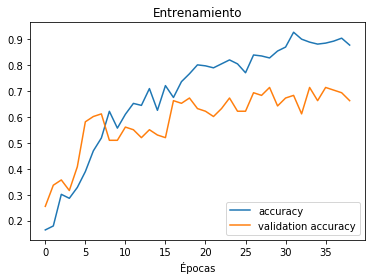

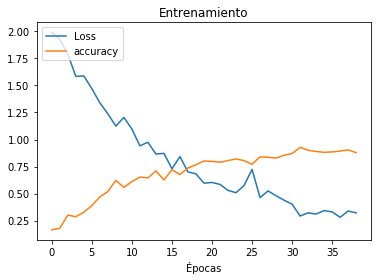

In [6]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')

plt.title('Entrenamiento')
plt.xlabel('Épocas')
plt.legend(loc="lower right")

plt.show()




plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='accuracy')

plt.title('Entrenamiento')
plt.xlabel('Épocas')
plt.legend(loc="upper left")

plt.show()